In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import time
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras import Sequential
from sklearn.metrics import classification_report
import pickle
from sklearn.ensemble import RandomForestClassifier

In [79]:
def ajout_image_x(liste=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]):
    from PIL import Image
    from matplotlib.offsetbox import OffsetImage,AnnotationBbox
    place=0
    xy = [0.0, 0.0]
    for i in liste :
#         print(i)
#         print(place)
        img = Image.open(f'C:/Users\Maxime.ALTER/ProjetIA\ProjetIA\Dev_Biwi/images-ind_alphabet/{i}_{place}.png')
        img = img.resize((28,28))
        imagebox = OffsetImage(img, zoom=0.8)
        ab = AnnotationBbox(imagebox, xy,
                    xybox=(place, 24.),
                    pad=0.5,frameon=False)
        ax.add_artist(ab)  
        place=place+1
def ajout_image_y(liste=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]):
    from PIL import Image
    from matplotlib.offsetbox import OffsetImage,AnnotationBbox
    place=0
    xy = [0.0, 0.0]
    for i in liste :
#         print(i)
#         print(place)
        img = Image.open(f'C:/Users/Maxime.ALTER/ProjetIA/ProjetIA/Dev_Biwi/images-ind_alphabet/{i}_{place}.png')
        img = img.resize((28,28))
        imagebox = OffsetImage(img, zoom=0.8)
        ab = AnnotationBbox(imagebox, xy,
                    xybox=(-1,place),
                    pad=0.5,frameon=False)
        ax.add_artist(ab)  
        place=place+1

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [44]:
df = pd.read_csv("landmark.csv",on_bad_lines='skip')
X = df.drop(df.columns[0], axis = 1)
y = df[df.columns[0]]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

len(y_train.unique())

#y_train=keras.utils.to_categorical(y_train,27)
#y_test=keras.utils.to_categorical(y_test)

24

In [46]:
print("X_train shape" +  str(X_train.shape))
print("y_train shape" +  str(y_train.shape))
print("X_test shape" +  str(X_test.shape))
print("y_test shape" +  str(y_test.shape))

X_train shape(43281, 63)
y_train shape(43281,)
X_test shape(14428, 63)
y_test shape(14428,)


## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier()

reg = model.fit(X_train,y_train)
stop1 = time.time()

Y_pred = model.predict(X_test)
stop2 = time.time()
apprentissage_RFC = round(stop1-start,3)
prediction_RFC = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_RFC} s")
print(f"Temps d'apprentissage+prediction : {prediction_RFC} s")

Temps d'apprentissage : 35.07 s
Temps d'apprentissage+prediction : 35.562 s


In [84]:
with open('my_model.pkl', 'wb') as f:
  pickle.dump(model, f)

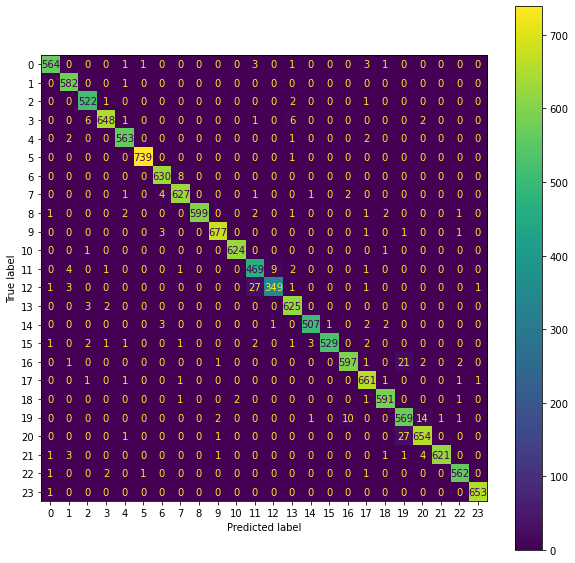

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       574
           1       0.98      1.00      0.99       583
           2       0.98      0.99      0.98       526
           3       0.99      0.98      0.98       664
           4       0.98      0.99      0.99       568
           5       1.00      1.00      1.00       740
           6       0.98      0.99      0.99       638
           7       0.98      0.99      0.98       636
           8       1.00      0.98      0.99       609
           9       0.99      0.99      0.99       683
          10       1.00      1.00      1.00       626
          11       0.93      0.96      0.95       487
          12       0.97      0.91      0.94       383
          13       0.98      0.99      0.98       630
          14       0.99      0.98      0.99       516
          15       1.00      0.97      0.99       543
          16       0.98      0.96      0.97       625
          17       0.97    

## CNN

In [50]:
from keras.layers import Conv2D,Flatten,MaxPool2D,BatchNormalization,Activation,Dropout
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [51]:
print("X_train shape" +  str(X_train.shape))
print("y_train shape" +  str(y_train.shape))
print("X_test shape" +  str(X_test.shape))
print("y_test shape" +  str(y_test.shape))

X_train shape(43281, 63)
y_train shape(43281,)
X_test shape(14428, 63)
y_test shape(14428,)


In [57]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=63, input_shape=[63]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=24, activation='softmax')
])

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 63)                4032      
                                                                 
 dropout_9 (Dropout)         (None, 63)                0         
                                                                 
 dense_28 (Dense)            (None, 128)               8192      
                                                                 
 dense_29 (Dense)            (None, 256)               33024     
                                                                 
 dense_30 (Dense)            (None, 512)               131584    
                                                                 
 dense_31 (Dense)            (None, 512)               262656    
                                                                 
 dropout_10 (Dropout)        (None, 512)              

In [58]:
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [59]:
y_train_encoded = pd.get_dummies(y_train, prefix='target')
y_test_encoded = pd.get_dummies(y_test, prefix='target')
y_train_encoded.head(3)

,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,...,target_14,target_15,target_16,target_17,target_18,target_19,target_20,target_21,target_22,target_23
52492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

In [61]:
start = time.time()

history = model1.fit(
    X_train,
    y_train_encoded,
    validation_split =0.2,
    epochs=25,
    callbacks=[early_stop]
)

stop1 = time.time()


y_pred = model1.predict(X_test)

stop2 = time.time()
apprentissage_RFC = round(stop1-start,3)
prediction_RFC = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_RFC} s")
print(f"Temps d'apprentissage+prediction : {prediction_RFC} s")

Epoch 1/25
1082/1082 [==============================] - 9s 6ms/step - loss: 1.0598 - accuracy: 0.6218 - val_loss: 0.3589 - val_accuracy: 0.8426
Epoch 2/25
1082/1082 [==============================] - 7s 6ms/step - loss: 0.3501 - accuracy: 0.8809 - val_loss: 0.1955 - val_accuracy: 0.9474
Epoch 3/25
1082/1082 [==============================] - 8s 7ms/step - loss: 0.2683 - accuracy: 0.9124 - val_loss: 0.2196 - val_accuracy: 0.9395
Epoch 4/25
1082/1082 [==============================] - 8s 8ms/step - loss: 0.2368 - accuracy: 0.9282 - val_loss: 0.1740 - val_accuracy: 0.9352
Epoch 5/25
1082/1082 [==============================] - 8s 7ms/step - loss: 0.2085 - accuracy: 0.9343 - val_loss: 0.0963 - val_accuracy: 0.9729
Epoch 6/25
1082/1082 [==============================] - 8s 8ms/step - loss: 0.1963 - accuracy: 0.9390 - val_loss: 0.1495 - val_accuracy: 0.9600
Epoch 7/25
1082/1082 [==============================] - 8s 7ms/step - loss: 0.1878 - accuracy: 0.9441 - val_loss: 0.1270 - val_accuracy:

In [81]:
 tf.saved_model.save(model1, r"C:/Users/Maxime.ALTER/ProjetIA/ProjetIA/Dev_max/CNN.pb")

INFO:tensorflow:Assets written to: C:/Users/Maxime.ALTER/ProjetIA/ProjetIA/Dev_max/CNN.pb\assets


INFO:tensorflow:Assets written to: C:/Users/Maxime.ALTER/ProjetIA/ProjetIA/Dev_max/CNN.pb\assets


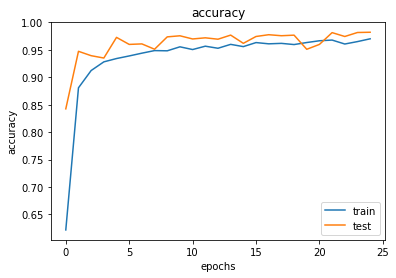

In [62]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","test"])

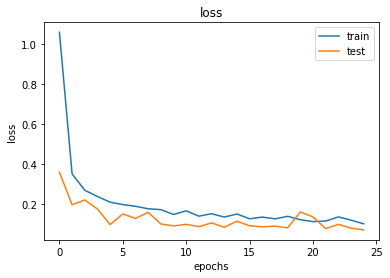

In [63]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","test"])

In [70]:
liste_lettre=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]
liste_nb = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

y_pred_value = np.argmax(y_pred, axis=1)

print(y_pred_value)
print(y_test)
#y_test2 = []

#for value in y_test : 
#    if value in liste_lettre:
#        y_test2.append(liste_lettre.index(value))
#
#print(y_test2)

[ 7 13  6 ...  8 22  1]
18046     7
31034    13
15871     6
24589     9
43440    18
         ..
57558    23
56576    23
22071     8
53110    22
3944      1
Name: 0, Length: 14428, dtype: int64


In [71]:
print(y_test.shape, y_pred_value.shape)


(14428,) (14428,)


In [73]:
print(classification_report(y_test, y_pred_value))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       574
           1       0.99      1.00      1.00       583
           2       1.00      1.00      1.00       526
           3       0.99      0.98      0.98       664
           4       0.98      0.99      0.99       568
           5       1.00      1.00      1.00       740
           6       0.99      1.00      0.99       638
           7       0.99      1.00      0.99       636
           8       1.00      0.98      0.99       609
           9       0.99      0.99      0.99       683
          10       1.00      1.00      1.00       626
          11       0.91      0.96      0.93       487
          12       0.96      0.89      0.92       383
          13       0.98      1.00      0.99       630
          14       0.99      0.98      0.99       516
          15       1.00      0.99      0.99       543
          16       1.00      0.94      0.97       625
          17       0.98    

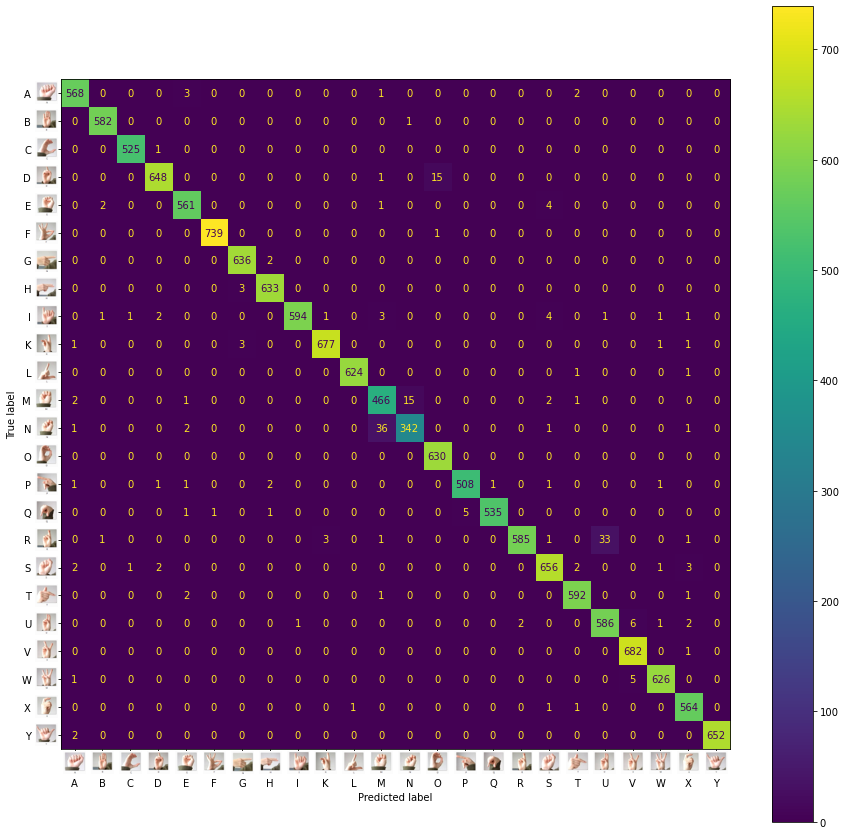

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred_value)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
ASL_ticks=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]
ax.tick_params(axis='x', which='major', pad=26)
ax.tick_params(axis='y', which='major', pad=26)
# Set the x-tick labels
ax.set_xticklabels(ASL_ticks)
ax.set_yticklabels(ASL_ticks)
xtick_positions = ax.get_xticks()
ytick_positions = ax.get_yticks()

ajout_image_x()
ajout_image_y()

fig.set_size_inches(15, 15)